In [8]:
import glob
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
hall=1
df = pd.read_csv( "datasets\evaluacion\positional_information\\2_nonfiltered.csv",
dtype={"original_cluster":str})
filepath = f"datasets\evaluacion\positional_information\\3_eval_cluster_hall_{hall}.csv"

Text(0.5, 0, 'z')

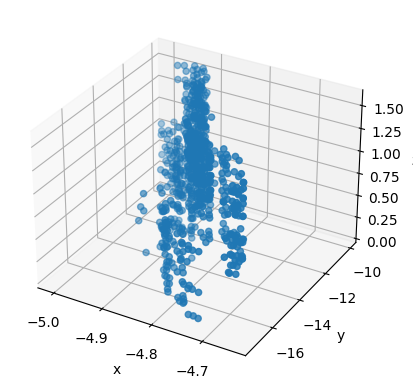

In [9]:
df["hall"]=[name.split("_")[0] for name in df["name"]]
df_hall = df[df["hall"]==f"{hall}"]
data=[[x,y,z] for x,y,z in zip(df_hall["x"], df_hall["y"],df_hall["z"])]
fig =plt.figure()
ax  =fig.add_subplot(111,projection='3d')
ax.scatter(df_hall["x"], df_hall["y"],df_hall["z"])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

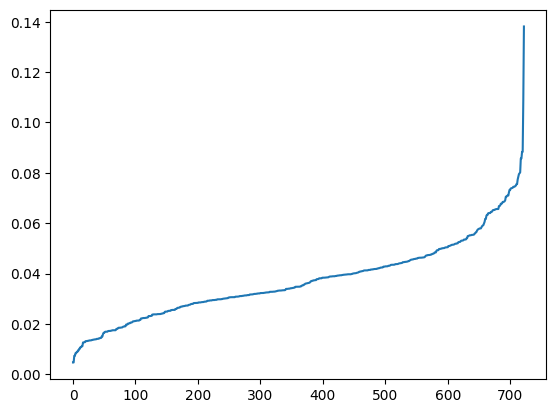

In [10]:
# maximizando elbow
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=6) # 2xDim https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [11]:
from kneed import KneeLocator
kneedle = KneeLocator(list(range(0,len(distances))), distances, S=1.0, curve='convex', direction='increasing')
print(distances[kneedle.knee])
print(distances[kneedle.elbow])

0.08830577733303224
0.08830577733303224


In [12]:
model = DBSCAN(eps=distances[kneedle.elbow], min_samples=1) # Para la ejecucion de dbscan se escoge segun la necesidad.
model.fit_predict(data)
pred = model.fit_predict(data)
max(pred)

180

In [13]:
df_hall["cluster"]=[ str(i).rjust(6,"0") for i in list(pred)]

C:\Users\fnand\AppData\Local\Temp\ipykernel_4272\1104059547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hall["cluster"]=[ str(i).rjust(6,"0") for i in list(pred)]


In [14]:
df_hall.drop(columns=['x', 'y',"z","hall"]).to_csv(filepath,sep=",",index=False)